# Recommended Engine

> * 1. Content Based Filtering (Based on content)
> * 2. Collaborative Based Filtering (Based On Used behaviour)

# Content Based Filtering

>* Memory Based Using Cosine Similarity


In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Amazon_saree.csv',usecols=['brand','name','disc_price','act_price','imag_url'])
#,usecols=['brand','name','disc_price','act_price']

In [3]:
df.head(5)

,brand,name,disc_price,act_price,imag_url
0,SATYAPAUL,Satya crepe with Blouse Piece Saree (RD11669_0...,"5,397","8,995",https://m.media-amazon.com/images/I/71kd5x-30V...
1,SATYAPAUL,Satya crepe with Blouse Piece Saree (RD11669_0...,"5,397","8,995",https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,SATYAPAUL,Satya crepe with blouse piece Saree (RD11665_0...,"5,397","8,995",https://m.media-amazon.com/images/I/71jssuzjyC...
3,SATYAPAUL,Satya crepe with blouse piece Saree (RD11669_0...,"5,397","8,995",https://m.media-amazon.com/images/I/811EWsAQoh...
4,ANNI DESIGNER,Women's Banarasi Silk Printed Saree,349,"2,598",https://m.media-amazon.com/images/I/91WCQ88UV5...


In [4]:
# Short Information About data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23988 entries, 0 to 23987
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand       23988 non-null  object
 1   name        23988 non-null  object
 2   disc_price  23472 non-null  object
 3   act_price   23229 non-null  object
 4   imag_url    23988 non-null  object
dtypes: object(5)
memory usage: 937.2+ KB


In [5]:
df.shape

(23988, 5)

In [6]:
# Removed commas(,)
df['disc_price'] = df['disc_price'].str.replace(',','')
df['act_price'] = df['act_price'].str.replace(',','')

In [7]:
# Checking the missing values
df.isnull().sum()

brand           0
name            0
disc_price    516
act_price     759
imag_url        0
dtype: int64

In [8]:
# Missing Values Imputation
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,
    strategy='most_frequent')

In [9]:
# Imputing Missing Values
df['disc_price'] = si.fit_transform(df[['disc_price']])
df['act_price'] =  si.fit_transform(df[['act_price']])

In [10]:
# Checking Missing Values
df.isna().sum()

brand         0
name          0
disc_price    0
act_price     0
imag_url      0
dtype: int64

In [11]:
# Changing the data types object to float
df['disc_price'] = df['disc_price'].astype(float)
df['act_price'] = df['act_price'].astype(float)

In [12]:
# Removing unwanted Words
df['name'] = df['name'].str.split('(', n = 1, expand = True)[0]
df.head(2)

,brand,name,disc_price,act_price,imag_url
0,SATYAPAUL,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,SATYAPAUL,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...


In [13]:
df.describe()

,disc_price,act_price
count,23988.000000,23988.000000
mean,1154.015633,3334.274954
std,1942.165291,2818.537815
min,150.000000,189.000000
25%,592.000000,1999.000000
50%,899.000000,2799.000000
75%,1274.000000,4199.000000
max,54995.000000,129999.000000


In [14]:
# Converting To Lower Case
df['brand'] = df['brand'].str.lower()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23988 entries, 0 to 23987
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       23988 non-null  object 
 1   name        23988 non-null  object 
 2   disc_price  23988 non-null  float64
 3   act_price   23988 non-null  float64
 4   imag_url    23988 non-null  object 
dtypes: float64(2), object(3)
memory usage: 937.2+ KB


# Natural Language Processing

In [16]:
# Checking Duplicates image Links
df.imag_url.value_counts()

https://m.media-amazon.com/images/I/51dD6pkvgoS._AC_UL320_.jpg    40
https://m.media-amazon.com/images/I/412pEwRkOBS._AC_UL320_.jpg    40
https://m.media-amazon.com/images/I/51Qa2K94iES._AC_UL320_.jpg    37
https://m.media-amazon.com/images/I/91Sx9pCEs7L._AC_UL320_.jpg    23
https://m.media-amazon.com/images/I/91RexoAqeGL._AC_UL320_.jpg    22
                                                                  ..
https://m.media-amazon.com/images/I/71FG8yrIevL._AC_UL320_.jpg     1
https://m.media-amazon.com/images/I/61WZOgAsxCS._AC_UL320_.jpg     1
https://m.media-amazon.com/images/I/A1Mm1ab1hWL._AC_UL320_.jpg     1
https://m.media-amazon.com/images/I/81c7ZkfRN1L._AC_UL320_.jpg     1
https://m.media-amazon.com/images/I/61dqAe6vvjS._AC_UL320_.jpg     1
Name: imag_url, Length: 15724, dtype: int64

In [17]:
# Removing Duplicates image link
df['imag_url'] = df['imag_url'].drop_duplicates()

# Duplicate removed data saved as csv

In [81]:
df.to_csv('Duplicate_removed1.csv')

In [85]:
df1 = pd.read_csv('Duplicate_removed1.csv')
df1

,Unnamed: 0,brand,name,disc_price,act_price,imag_url
0,0,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,1,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,2,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...
3,3,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...
4,4,anni designer,womens banarasi silk printed saree,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...
...,...,...,...,...,...,...
15719,15719,kabir fabrics,womens shubh kanchi pattu kanchipuram silk sar...,1499.0,4999.0,https://m.media-amazon.com/images/I/614kd3kV+W...
15720,15720,toshika,womens hand block printed cotton mulmul saree ...,899.0,2999.0,https://m.media-amazon.com/images/I/61E5Ti0h7o...
15721,15721,handloom saga,sambalpuri pure cotton ikat border traditional...,999.0,1999.0,https://m.media-amazon.com/images/I/61YjL7QHLb...
15722,15722,pandadi saree,womens pochampally cotton blend saree unstitch...,847.0,1999.0,https://m.media-amazon.com/images/I/81QNAqXyOm...


In [88]:
df1.columns = ['index', 'brand', 'name', 'disc_price', 'act_price', 'imag_url']

In [91]:
# For Deployment we need orignal Cleaned DataFrame
df1.to_csv('Saree_removed_duplicate.csv',index=False)

In [18]:
# Checking missing values after removing the duplicates link.
df.isna().sum()

brand            0
name             0
disc_price       0
act_price        0
imag_url      8264
dtype: int64

In [19]:
# Droping the missing values w.r.t image link
df = df.dropna()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 0 to 23983
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       15724 non-null  object 
 1   name        15724 non-null  object 
 2   disc_price  15724 non-null  float64
 3   act_price   15724 non-null  float64
 4   imag_url    15724 non-null  object 
dtypes: float64(2), object(3)
memory usage: 737.1+ KB


In [21]:
# After droping the duplicate image links index was mismatch
df.reset_index(inplace=True)

In [22]:
df

,index,brand,name,disc_price,act_price,imag_url
0,0,satyapaul,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,1,satyapaul,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,2,satyapaul,Satya crepe with blouse piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...
3,3,satyapaul,Satya crepe with blouse piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...
4,4,anni designer,Women's Banarasi Silk Printed Saree,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...
...,...,...,...,...,...,...
15719,23979,kabir fabrics,Women's shubh kanchi Pattu Kanchipuram Silk Sa...,1499.0,4999.0,https://m.media-amazon.com/images/I/614kd3kV+W...
15720,23980,toshika,Women's Hand Block Printed Cotton Mulmul Saree...,899.0,2999.0,https://m.media-amazon.com/images/I/61E5Ti0h7o...
15721,23981,handloom saga,"Sambalpuri Pure Cotton 10"" Ikat Border with Tr...",999.0,1999.0,https://m.media-amazon.com/images/I/61YjL7QHLb...
15722,23982,pandadi saree,Women's Pochampally Cotton Blend Saree With Un...,847.0,1999.0,https://m.media-amazon.com/images/I/81QNAqXyOm...


In [23]:
df.drop('index',axis=1,inplace=True)


In [24]:
df

,brand,name,disc_price,act_price,imag_url
0,satyapaul,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,satyapaul,Satya crepe with Blouse Piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,satyapaul,Satya crepe with blouse piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...
3,satyapaul,Satya crepe with blouse piece Saree,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...
4,anni designer,Women's Banarasi Silk Printed Saree,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...
...,...,...,...,...,...
15719,kabir fabrics,Women's shubh kanchi Pattu Kanchipuram Silk Sa...,1499.0,4999.0,https://m.media-amazon.com/images/I/614kd3kV+W...
15720,toshika,Women's Hand Block Printed Cotton Mulmul Saree...,899.0,2999.0,https://m.media-amazon.com/images/I/61E5Ti0h7o...
15721,handloom saga,"Sambalpuri Pure Cotton 10"" Ikat Border with Tr...",999.0,1999.0,https://m.media-amazon.com/images/I/61YjL7QHLb...
15722,pandadi saree,Women's Pochampally Cotton Blend Saree With Un...,847.0,1999.0,https://m.media-amazon.com/images/I/81QNAqXyOm...


In [25]:
# Importin nltk(Natural Language Tool Kit)
import nltk

### What is Tokenization in NLP?

*  Tokenization is one of the most common tasks when it comes to working with text data. But what does the term ‘tokenization’ actually mean?

>* Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

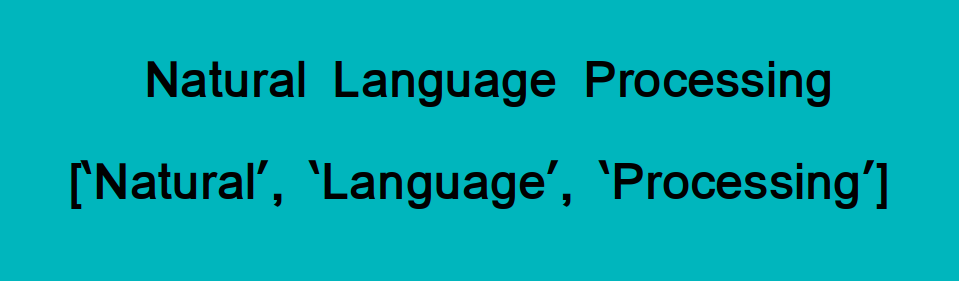

The tokens could be words, numbers or punctuation marks. In tokenization, smaller units are created by locating word boundaries. Wait – what are word boundaries?

These are the ending point of a word and the beginning of the next word. These tokens are considered as a first step for stemming and lemmatization (the next stage in text preprocessing which we will cover in the next

###  Why is Tokenization required in NLP?

I want you to think about the English language here. Pick up any sentence you can think of and hold that in your mind as you read this section. This will help you understand the importance of tokenization in a much easier manner.

Before processing a natural language, we need to identify the words that constitute a string of characters. That’s why tokenization is the most basic step to proceed with NLP (text data). This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text.

Let’s take an example. Consider the below string:

“This is a cat.”

What do you think will happen after we perform tokenization on this string? We get [‘This’, ‘is’, ‘a’, cat’].

There are numerous uses of doing this. We can use this tokenized form to:

Count the number of words in the text
Count the frequency of the word, that is, the number of times a particular word is present
And so on. We can extract a lot more information which we’ll discuss in detail in future articles. For now, it’s time to dive into the meat of this article – the different methods of performing tokenization in NLP.



In [26]:
df.name

0                     Satya crepe with Blouse Piece Saree 
1                     Satya crepe with Blouse Piece Saree 
2                     Satya crepe with blouse piece Saree 
3                     Satya crepe with blouse piece Saree 
4                      Women's Banarasi Silk Printed Saree
                               ...                        
15719    Women's shubh kanchi Pattu Kanchipuram Silk Sa...
15720    Women's Hand Block Printed Cotton Mulmul Saree...
15721    Sambalpuri Pure Cotton 10" Ikat Border with Tr...
15722    Women's Pochampally Cotton Blend Saree With Un...
15723    Women's Bandhej Gharchola Saree with unstitche...
Name: name, Length: 15724, dtype: object

## 1. Removed Punctuations

In [27]:
df.name = df.name.replace("'",'', regex=True) # Remove Women's special char 
df.name = df.name.replace("’",'', regex=True) # Both special character are diff to each other

In [28]:
#Cleaning the text data keeping only alphabets either capital or small and converting all to a lower case
import re

corpus = []

sentences = df['name']

for i in range(len(sentences)):
    #print(sentences[i])
    review = re.sub('[^a-zA-Z]',' ', sentences[i])
    review = review.lower()
    corpus.append(review)

print(corpus)


['satya crepe with blouse piece saree ', 'satya crepe with blouse piece saree ', 'satya crepe with blouse piece saree ', 'satya crepe with blouse piece saree ', 'womens banarasi silk printed saree', 'womens banarasi kanjivaram silk jacquard saree with blouse piece', 'womens saree dola silk materials with hot fix stone work  weaving design unstitched blouse brocket lace blouse fabric  heavy boarder ', 'womens zoya silk printed saree', 'womens art silk saree with blouse piece', 'womens half design cotton kanchipuram and cotton embroidery work replica casual beautiful saree with blouse material for sadi offer marriage', 'women sana silk saree', 'soft cotton   silk saree for women banarasi saree under          beautiful for women saree', 'womens chanderi silk jacquard butta saree with blouse piece', 'womens digital cotton linen blend saree with unstitched blouse piece', 'womens georgette floral printed saree with blouse piece', 'womens woven linen saree with blouse piece', 'sgf  women kanj

In [29]:
df.name[53:60]

53    Womens Plain Weave Cotton Saree Without blouse...
54                                          Women Saree
55         Womens Banarasi Silk Saree With Blouse Piece
56                    JAYTRA SAREES BANARASI SILK SAREE
57    Ladoo Creation Tapeta Velvet Designer Saree Fo...
58    Womens Kanjivaram Cotton Silk Blend Saree with...
59    women kanjivaram pure banarasi silk saree kanc...
Name: name, dtype: object

In [30]:
# Capturing The text data to same column
df["name"] = pd.DataFrame(corpus)

###  2. Removed stop words

In [31]:
# Removing English Stopwords(If we converting text to numeric then Stopwords also take a column thats why we removed it.)
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['name'] = df['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df.name)


0                           satya crepe blouse piece saree
1                           satya crepe blouse piece saree
2                           satya crepe blouse piece saree
3                           satya crepe blouse piece saree
4                       womens banarasi silk printed saree
                               ...                        
15719    womens shubh kanchi pattu kanchipuram silk sar...
15720    womens hand block printed cotton mulmul saree ...
15721    sambalpuri pure cotton ikat border traditional...
15722    womens pochampally cotton blend saree unstitch...
15723    womens bandhej gharchola saree unstitched blou...
Name: name, Length: 15724, dtype: object


In [32]:
df

,brand,name,disc_price,act_price,imag_url
0,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...
3,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...
4,anni designer,womens banarasi silk printed saree,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...
...,...,...,...,...,...
15719,kabir fabrics,womens shubh kanchi pattu kanchipuram silk sar...,1499.0,4999.0,https://m.media-amazon.com/images/I/614kd3kV+W...
15720,toshika,womens hand block printed cotton mulmul saree ...,899.0,2999.0,https://m.media-amazon.com/images/I/61E5Ti0h7o...
15721,handloom saga,sambalpuri pure cotton ikat border traditional...,999.0,1999.0,https://m.media-amazon.com/images/I/61YjL7QHLb...
15722,pandadi saree,womens pochampally cotton blend saree unstitch...,847.0,1999.0,https://m.media-amazon.com/images/I/81QNAqXyOm...


## TF-IDF name column

In [33]:
# Converting Features to Vector
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
df1 = v.fit_transform(df['name']).toarray()


In [34]:
df1.shape

(15724, 2970)

In [35]:
# If not capturing a seperate data frame then it's need high ammount of computational power
name = pd.DataFrame(df1)

In [36]:
name

,0,1,2,3,4,5,6,7,8,9,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df.shape

(15724, 5)

In [38]:
df.head()

,brand,name,disc_price,act_price,imag_url
0,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...
1,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...
2,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...
3,satyapaul,satya crepe blouse piece saree,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...
4,anni designer,womens banarasi silk printed saree,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...


## OneHotEncoding brand column

In [39]:
from sklearn.preprocessing import OneHotEncoder


In [40]:
# Applying OneHotEncoder because there is only one category
one_hot_enc = OneHotEncoder()

arr =  one_hot_enc.fit_transform(df[['brand']]).toarray()


In [41]:
arr.shape

(15724, 1852)

In [42]:
brand = pd.DataFrame(arr)
brand

,0,1,2,3,4,5,6,7,8,9,...,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Concatinating Data Frames

new = pd.concat([df,brand,name], axis=1)

In [44]:
# Droping two features because it's converted to vector form
new = new.drop(['brand','name'],axis=1)

In [45]:
new

,disc_price,act_price,imag_url,0,1,2,3,4,5,6,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
0,5397.0,8995.0,https://m.media-amazon.com/images/I/71kd5x-30V...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5397.0,8995.0,https://m.media-amazon.com/images/I/81i4TVTnMZ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5397.0,8995.0,https://m.media-amazon.com/images/I/71jssuzjyC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5397.0,8995.0,https://m.media-amazon.com/images/I/811EWsAQoh...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,349.0,2598.0,https://m.media-amazon.com/images/I/91WCQ88UV5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,1499.0,4999.0,https://m.media-amazon.com/images/I/614kd3kV+W...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15720,899.0,2999.0,https://m.media-amazon.com/images/I/61E5Ti0h7o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15721,999.0,1999.0,https://m.media-amazon.com/images/I/61YjL7QHLb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15722,847.0,1999.0,https://m.media-amazon.com/images/I/81QNAqXyOm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying Standard scaler to convert in same scale both price features

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [48]:
new[['disc_price','act_price']] = sc.fit_transform(new[['disc_price','act_price']])

In [49]:
new.drop('imag_url', axis=1, inplace=True)

In [50]:
new1=new[0:-1]
new1

,disc_price,act_price,0,1,2,3,4,5,6,7,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
0,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.359743,-0.182739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,-0.222393,-0.776431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15719,0.166764,0.609620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15720,-0.107935,-0.050405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15721,-0.062152,-0.380417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Image processing

## Downloading Images

In [51]:

#import pandas as pd
#import urllib.request
#def url_to_jpg(i,url,file_path,filename):
 #       fullpath='{}\\{}'.format(file_path,filename)
  #      urllib.request.urlretrieve(url,fullpath)
   #     print('{}saved'.format(filename))
    #    return None

#urls=new['imag_url']
#file_path= 'C:\\Users\prash\Desktop\InternShip\Project 2 Recomended System\image'
#for i,url in enumerate(urls):
 #   filename=url.rsplit('/')[-1]
  #  url_to_jpg(i,url,file_path,filename)

In [52]:
df.imag_url.value_counts()

https://m.media-amazon.com/images/I/71kd5x-30VL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/716ftkKU0cL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/81wZRsnRWtS._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/31+2TJ3kbnL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/91zgpnGnMfL._AC_UL320_.jpg    1
                                                                 ..
https://m.media-amazon.com/images/I/51ZCYMbhtCL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/61CXUZte8PL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/41D1uouBBzL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/610rjfXZ5lL._AC_UL320_.jpg    1
https://m.media-amazon.com/images/I/61dqAe6vvjS._AC_UL320_.jpg    1
Name: imag_url, Length: 15724, dtype: int64

# To See the code goto the link (Github)

https://github.com/Prashant-datascientist/CNN_Image_to_vector_code/blob/main/CNN_Image_to_vector_conversion.ipynb

* To convert this we need to good ammoun of CPU and GPU therefore i am Google Colaboratory.

## Adding the image csv file which is converted into vector form

In [53]:
image = pd.read_csv('image.csv')

In [54]:
image

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0.000000,0.0,0.0,0.001359,0.001875,0.0,0.0,0.006909,0.040015,...,0.0,0.000000,0.581451,0.0,0.0,0.0,0.0,0.0,0.003409,0.0
1,1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.005474,0.115379,...,0.0,0.002659,0.583455,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2,0.000000,0.0,0.0,0.000000,0.002446,0.0,0.0,0.025064,0.070303,...,0.0,0.000000,0.628490,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,3,0.017614,0.0,0.0,0.000000,0.000000,0.0,0.0,0.024002,0.000000,...,0.0,0.000000,0.579571,0.0,0.0,0.0,0.0,0.0,0.004793,0.0
4,4,0.000000,0.0,0.0,0.000000,0.007709,0.0,0.0,0.002713,0.052950,...,0.0,0.000000,0.649023,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,15718,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.081276,...,0.0,0.005026,0.585707,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15719,15719,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.048551,...,0.0,0.000000,0.330618,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15720,15720,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.034275,...,0.0,0.000000,0.366462,0.0,0.0,0.0,0.0,0.0,0.007834,0.0
15721,15721,0.062612,0.0,0.0,0.000000,0.000000,0.0,0.0,0.009108,0.004358,...,0.0,0.000000,0.551863,0.0,0.0,0.0,0.0,0.0,0.001814,0.0


In [55]:
# Extra index column
image.drop('Unnamed: 0',axis=1)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,0.0,0.0,0.001359,0.001875,0.0,0.0,0.006909,0.040015,0.0,...,0.0,0.000000,0.581451,0.0,0.0,0.0,0.0,0.0,0.003409,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.005474,0.115379,0.0,...,0.0,0.002659,0.583455,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.002446,0.0,0.0,0.025064,0.070303,0.0,...,0.0,0.000000,0.628490,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.017614,0.0,0.0,0.000000,0.000000,0.0,0.0,0.024002,0.000000,0.0,...,0.0,0.000000,0.579571,0.0,0.0,0.0,0.0,0.0,0.004793,0.0
4,0.000000,0.0,0.0,0.000000,0.007709,0.0,0.0,0.002713,0.052950,0.0,...,0.0,0.000000,0.649023,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.081276,0.0,...,0.0,0.005026,0.585707,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15719,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.048551,0.0,...,0.0,0.000000,0.330618,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15720,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.034275,0.0,...,0.0,0.000000,0.366462,0.0,0.0,0.0,0.0,0.0,0.007834,0.0
15721,0.062612,0.0,0.0,0.000000,0.000000,0.0,0.0,0.009108,0.004358,0.0,...,0.0,0.000000,0.551863,0.0,0.0,0.0,0.0,0.0,0.001814,0.0


## Concatenating both Data Frames 

In [56]:
#vector_convertd_df = pd.concat([new1,image], axis='columns')

vector_convertd_df = pd.merge(new1,image,right_index=True,left_index=True)


In [57]:
vector_convertd_df

,disc_price,act_price,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.581451,0.0,0.0,0.0,0.0,0.0,0.003409,0.0
1,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002659,0.583455,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.628490,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1.951391,1.928349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.579571,0.0,0.0,0.0,0.0,0.0,0.004793,0.0
4,-0.359743,-0.182739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.649023,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,-0.222393,-0.776431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.005026,0.585707,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15719,0.166764,0.609620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.330618,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15720,-0.107935,-0.050405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.366462,0.0,0.0,0.0,0.0,0.0,0.007834,0.0
15721,-0.062152,-0.380417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.551863,0.0,0.0,0.0,0.0,0.0,0.001814,0.0


In [58]:
vector_convertd_df.shape

(15723, 6873)

### Applying cosine similarity to get similar product.

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [60]:
sp = sparse.csc_matrix(vector_convertd_df)

In [61]:
cs = cosine_similarity(sp)

In [62]:
sp

<15723x6873 sparse matrix of type '<class 'numpy.float64'>'
	with 9272516 stored elements in Compressed Sparse Column format>

In [63]:
cs

array([[1.        , 0.99597863, 0.99650734, ..., 0.00193365, 0.00198132,
        0.00195903],
       [0.99597863, 1.        , 0.99634054, ..., 0.03382637, 0.03387623,
        0.03385282],
       [0.99650734, 0.99634054, 1.        , ..., 0.06700237, 0.06703857,
        0.06702767],
       ...,
       [0.00193365, 0.03382637, 0.06700237, ..., 1.        , 0.99999986,
        0.99999996],
       [0.00198132, 0.03387623, 0.06703857, ..., 0.99999986, 1.        ,
        0.99999988],
       [0.00195903, 0.03385282, 0.06702767, ..., 0.99999996, 0.99999988,
        1.        ]])

In [64]:
cs.shape

(15723, 15723)

In [65]:
# Similar products capture in a data frame
df4 = pd.DataFrame(cs)

In [66]:
df4

,0,1,2,3,4,5,6,7,8,9,...,15713,15714,15715,15716,15717,15718,15719,15720,15721,15722
0,1.000000,0.995979,0.996507,0.964908,0.980248,0.968727,0.961814,0.935880,0.956560,0.949739,...,0.001956,0.001933,0.001861,0.001895,0.001953,0.002039,0.001890,0.001934,0.001981,0.001959
1,0.995979,1.000000,0.996341,0.967449,0.984774,0.973370,0.966380,0.945647,0.963202,0.955471,...,0.033848,0.033818,0.033752,0.033784,0.033839,0.033941,0.033784,0.033826,0.033876,0.033853
2,0.996507,0.996341,1.000000,0.960967,0.984220,0.972703,0.966451,0.941129,0.972464,0.965926,...,0.067018,0.066999,0.066928,0.066960,0.067019,0.067107,0.066954,0.067002,0.067039,0.067028
3,0.964908,0.967449,0.960967,1.000000,0.973221,0.980429,0.981438,0.978890,0.938197,0.938181,...,0.097042,0.096963,0.096936,0.096945,0.096986,0.097081,0.096958,0.096958,0.097104,0.096990
4,0.980248,0.984774,0.984220,0.973221,1.000000,0.991028,0.988883,0.973955,0.980988,0.977608,...,0.127295,0.127261,0.127211,0.127231,0.127281,0.127383,0.127229,0.127266,0.127338,0.127295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,0.002039,0.033941,0.067107,0.097081,0.127383,0.161666,0.188264,0.208913,0.257285,0.286022,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
15719,0.001890,0.033784,0.066954,0.096958,0.127229,0.161522,0.188123,0.208782,0.257124,0.285867,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
15720,0.001934,0.033826,0.067002,0.096958,0.127266,0.161542,0.188145,0.208786,0.257176,0.285917,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
15721,0.001981,0.033876,0.067039,0.097104,0.127338,0.161650,0.188263,0.208947,0.257209,0.285956,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df4.shape

(15723, 15723)

In [68]:
df4.shape[0]

15723

In [69]:
# Getting top 10 similar product
sim_list = []
for i in range(df4.shape[0]):
    sim_list.append(list(df4[i].sort_values(ascending=False)[:11].index))

In [70]:
sim_list

[[0, 2, 1, 4, 5, 3, 6, 8, 9, 7, 10],
 [1, 2, 0, 4, 5, 3, 6, 8, 9, 7, 10],
 [2, 0, 1, 4, 5, 8, 6, 9, 3, 10, 7],
 [3, 6, 5, 7, 4, 1, 0, 2, 10, 11, 8],
 [4, 5, 6, 1, 2, 8, 0, 9, 10, 7, 3],
 [5, 6, 4, 10, 7, 3, 8, 9, 1, 2, 0],
 [6, 5, 7, 4, 10, 3, 9, 8, 12, 11, 2],
 [7, 6, 5, 10, 3, 4, 15, 11, 13, 12, 9],
 [8, 9, 12, 4, 10, 5, 6, 2, 11, 17, 14],
 [9, 8, 12, 10, 4, 11, 6, 5, 17, 14, 18],
 [10, 12, 11, 6, 5, 14, 15, 13, 9, 7, 8],
 [11, 14, 12, 10, 16, 15, 9, 17, 13, 8, 19],
 [12, 14, 9, 10, 11, 17, 8, 13, 18, 19, 16],
 [13, 12, 15, 10, 14, 16, 11, 17, 19, 22, 9],
 [14, 16, 11, 12, 15, 19, 17, 10, 21, 13, 18],
 [15, 16, 14, 10, 13, 12, 11, 19, 17, 21, 22],
 [16, 14, 15, 19, 21, 17, 12, 22, 11, 20, 13],
 [17, 18, 19, 20, 21, 12, 22, 14, 24, 25, 16],
 [18, 17, 19, 20, 21, 22, 25, 24, 12, 14, 27],
 [19, 17, 20, 18, 21, 22, 24, 25, 14, 23, 16],
 [20, 19, 21, 18, 17, 24, 22, 25, 27, 23, 28],
 [21, 20, 22, 19, 24, 25, 27, 23, 17, 18, 26],
 [22, 21, 23, 24, 25, 20, 27, 19, 26, 17, 18],
 [23, 22, 26,

In [71]:
# Converting similar list to a data frame
df_sim = pd.DataFrame(sim_list)

In [72]:
df_sim

,0,1,2,3,4,5,6,7,8,9,10
0,0,2,1,4,5,3,6,8,9,7,10
1,1,2,0,4,5,3,6,8,9,7,10
2,2,0,1,4,5,8,6,9,3,10,7
3,3,6,5,7,4,1,0,2,10,11,8
4,4,5,6,1,2,8,0,9,10,7,3
...,...,...,...,...,...,...,...,...,...,...,...
15718,15718,15042,15213,15613,14944,14950,15081,15502,15593,14842,14731
15719,15719,15567,15532,15716,15676,15230,15709,15515,15470,15480,15475
15720,15720,15457,15669,15678,15692,15157,15628,15526,15679,15525,15711
15721,15721,15297,15516,15460,14922,15651,15323,15262,15131,15579,14930


# Cosine Similarity CSV

In [92]:
df_sim.to_csv('recomended_saree.csv',index=False)

In [73]:
for i in df_sim.iloc[1]:
    print(df.iloc[i])

brand                                                 satyapaul
name                             satya crepe blouse piece saree
disc_price                                               5397.0
act_price                                                8995.0
imag_url      https://m.media-amazon.com/images/I/81i4TVTnMZ...
Name: 1, dtype: object
brand                                                 satyapaul
name                             satya crepe blouse piece saree
disc_price                                               5397.0
act_price                                                8995.0
imag_url      https://m.media-amazon.com/images/I/71jssuzjyC...
Name: 2, dtype: object
brand                                                 satyapaul
name                             satya crepe blouse piece saree
disc_price                                               5397.0
act_price                                                8995.0
imag_url      https://m.media-amazon.com/images/I/71kd5x-3